<a href="https://colab.research.google.com/github/Ashish-1521/ML-HW/blob/main/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For simple linear regression we use y=mx+c expression.
In the given data we use the first column as 'x' values and and the second column for the 'y' values in which x indicates the independent variable and y as the dependent variable we find the m and c values using differentiation for the gradient descent formula. For the first differentiation we get m and for the second we get c.

The data given is in the form of xls so we use read_csv to read the data and to access the column values we can use either iloc or use column and access them using the '.' operator with value like this 'data_["column_name"].values'. For non-linear data using cubic function we find the a,b,c,d values using the same method as single linear regression but the order of differentiation is increased.

For logistic regression we calculate the sigmoid value for the linear regression predicted or estimated value.

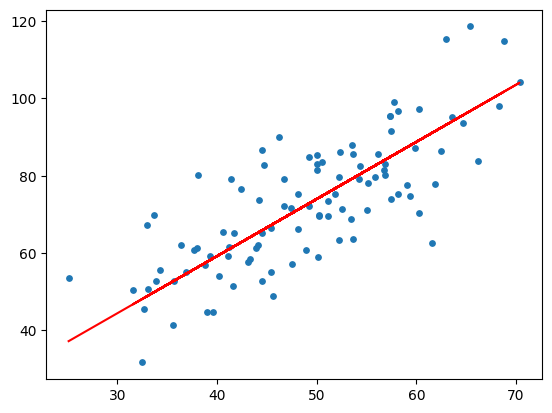

In [2]:
from pickle import NONE
from os import name
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

data_ = pd.read_csv("/content/sample_data/HW2_linear_data.csv",header=None)
Vector_X = data_.iloc[:,0]
Vector_Y = data_.iloc[:,1]
plt.scatter(Vector_X,Vector_Y,s=15)

# Calculating Gradient Descent values for the loss function with the help of linear equation (y = mx+c)
def Calculate_m_c(Learning_Rate, epochs, X,Y):
  m = 0
  c = 0
  L = Learning_Rate
  y_pred = 0
  n = len(X)
  for i in range(epochs):
    y_pred = m*X + c
    partialDerivative_m = (-2/n)*sum(Vector_X*(Y-y_pred))
    partialDerivative_c = (-2/n)*sum((Y-y_pred))
    m = m-(L*partialDerivative_m)
    c = c-(L*partialDerivative_c)
  y_pred = m*X + c
  return y_pred
# m = 0
# c = 0
# L = 0.0001 # L - learning rate for the model
# epochs = 1000 # no of iterations
# y_pred = 0
# n = len(Vector_X) # no of points

# for i in range(epochs):
#   y_pred = m*Vector_X + c
#   partialDerivative_m = (-2/n)*sum(Vector_X*(Vector_Y-y_pred))
#   partialDerivative_c = (-2/n)*sum((Vector_Y-y_pred))
#   m = m-(L*partialDerivative_m)
#   c = c-(L*partialDerivative_c)
# print(m,c)

predicted_Value = Calculate_m_c(0.0001,1000,Vector_X,Vector_Y)

#plotting against x and predicted y value with minimum loss function
plt.plot(Vector_X,predicted_Value,color='red')
plt.show()

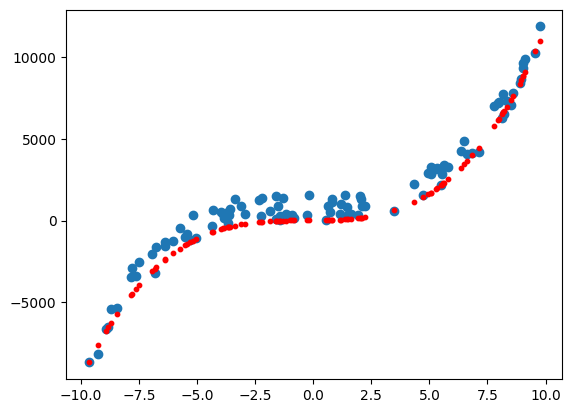

In [3]:
# def Calculate_Sigmoid(y_prediction):
#   e = 1/(1+np.e**(-y_prediction))
#   return e


def Calculate_Gradient_Cubic(Learning_Rate, epochs, X,Y):
  a,b,c,d = 0,0,0,0
  L = Learning_Rate
  y_pred = a*X**3 + b*X**2+c*X+d
  n = len(X)
  for i in range(epochs):
    y_pred = a*(X**3) + b*(X**2)+c*X+d
    partialDerivative_a = (-2/n)*sum(X*(Y-y_pred))
    partialDerivative_b = (-2/n)*sum(X*(Y-y_pred))
    partialDerivative_c = (-2/n)*sum(X*(Y-y_pred))
    partialDerivative_d = (-2/n)*sum((Y-y_pred))
    a = a-(L*partialDerivative_a)
    b = b-(L*partialDerivative_b)
    c = c-(L*partialDerivative_c)
    d = d-(L*partialDerivative_d)
    # y_pred = a*X**3 + b*X**2+c*X+d
  #y_pred = a*X**3 + b*X**2+c*X+d
  return y_pred


data_ = pd.read_csv("/content/sample_data/HW2_nonlinear_data.csv",header=0)
Vector_X = data_["X"].values
Vector_Y = data_["Y"].values
pred_y = Calculate_Gradient_Cubic(0.000001,10000,Vector_X,Vector_Y)
plt.scatter(Vector_X,Vector_Y)
plt.scatter(Vector_X,pred_y,10,color='red')
# Range_VectorX = np.linspace(min(Vector_X),max(Vector_X),100)
# pred_y_for_RangeX = Calculate_Gradient_Cubic(0.000001,10000,Range_VectorX,Vector_Y)
# plt.plot(Range_VectorX,pred_y_for_RangeX,color='yellow')